In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
input_path = 'kliknklik_gaming_laptop.csv'
output_path = 'laptop_final_processed.csv'
df = pd.read_csv(input_path)


In [20]:

columns_to_drop = ["Keyboard", "Microsoft Office"]
df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

print("Missing Values Before Handling:")
print(df_cleaned.isnull().sum())

numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in numeric_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("\nMissing Values After Handling:")
print(df_cleaned.isnull().sum())

print(f"\nTotal rows before removing duplicates: {len(df_cleaned)}")
df_cleaned = df_cleaned.drop_duplicates()
print(f"Total rows after removing duplicates: {len(df_cleaned)}")


Missing Values Before Handling:
Nama                0
Berat               0
Dimensi             0
Garansi             4
VGA                 0
Tipe Penyimpanan    0
Processor           0
Penyimpanan         0
Ukuran Layar        0
Warna               0
RAM                 0
Sistem Operasi      0
Brand               0
Tipe Layar          0
Harga               0
dtype: int64

Missing Values After Handling:
Nama                0
Berat               0
Dimensi             0
Garansi             0
VGA                 0
Tipe Penyimpanan    0
Processor           0
Penyimpanan         0
Ukuran Layar        0
Warna               0
RAM                 0
Sistem Operasi      0
Brand               0
Tipe Layar          0
Harga               0
dtype: int64

Total rows before removing duplicates: 646
Total rows after removing duplicates: 646


In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_before = len(df_cleaned)
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    df_after = len(df_cleaned)
    print(f"Outliers in {col}: {df_before - df_after} rows removed")


<Figure size 1500x1000 with 0 Axes>

In [22]:
if 'Berat' in df_cleaned.columns:
    df_cleaned['Berat'] = df_cleaned['Berat'].str.replace('kg', '').astype(float)


if 'Dimensi' in df_cleaned.columns:
    df_cleaned['Dimensi'] = df_cleaned['Dimensi'].str.replace(r'[^\d\.x]', '', regex=True)


if 'Penyimpanan' in df_cleaned.columns:
    df_cleaned['Penyimpanan'] = df_cleaned['Penyimpanan'].str.replace('TB', '000').str.replace('GB', '').astype(float)

if 'Harga' in df_cleaned.columns:
    df_cleaned['Harga'] = (
        df_cleaned['Harga']
        .str.replace('Rp', '', regex=True)
        .str.replace('[^0-9]', '', regex=True)
        .astype(float)
    )

In [23]:
if 'VGA' in df_cleaned.columns:
    df_cleaned['VGA'] = df_cleaned['VGA'].astype(str)
    df_cleaned['Jenis VGA'] = df_cleaned['VGA'].str.extract(r'(?i)(NVIDIA|AMD|Intel|GeForce|Radeon|RTX|GTX|Intel Iris|Intel UHD)')

    df_cleaned['Tier VGA'] = df_cleaned['VGA'].apply(lambda vga_name: (
        "1" if "rtx" in vga_name.lower() else
        "2" if "gtx" in vga_name.lower() or "rx" in vga_name.lower() else
        "3" if "mx" in vga_name.lower() or "intel iris" in vga_name.lower() or "radeon rx 5" in vga_name.lower() or "amd radeon" in vga_name.lower() else
        "Unknown Tier"
    ))

if 'Processor' in df_cleaned.columns:
    df_cleaned['Tier Processor'] = df_cleaned['Processor'].apply(lambda processor_name: (
        "1" if any(x in processor_name.lower() for x in ["i9", "ryzen 9", "i7", "ryzen 7"]) else
        "2" if any(x in processor_name.lower() for x in ["i5", "ryzen 5"]) else
        "3" if any(x in processor_name.lower() for x in ["i3", "ryzen 3"]) else
        "4" if any(x in processor_name.lower() for x in ["celeron", "pentium"]) else
        "Unknown Tier"
    ))

df_cleaned.to_csv(output_path, index=False)
print(f"\nFinal dataset saved to: {output_path}")
print("\nSample Data:")
print(df_cleaned.head())



Final dataset saved to: laptop_final_processed.csv

Sample Data:
                                                Nama  Berat Dimensi  \
0  RAZER BLADE ADVANCE 18 INTEL I9 13950HX 64GB D...    5.0  402010   
1  RAZER BLADE ADVANCE 18 INTEL I9 13950HX 32GB D...    5.0  402010   
2  RAZER BLADE ADVANCE 16 INTEL I9 13950HX 32GB D...    5.0  402010   
3  RAZER BLADE ADVANCE 16 INTEL I9 13950HX 32GB D...    5.0  402010   
4  RAZER BLADE ADVANCE 16 INTEL I9 13950HX 16GB D...    5.0  402010   

                              Garansi             VGA Tipe Penyimpanan  \
0  RAZER 1 YEAR (SERVICE & SPAREPART)  NVIDIA RTX4090              SSD   
1  RAZER 1 YEAR (SERVICE & SPAREPART)  NVIDIA RTX4090              SSD   
2  RAZER 1 YEAR (SERVICE & SPAREPART)  NVIDIA RTX4090              SSD   
3  RAZER 1 YEAR (SERVICE & SPAREPART)  NVIDIA RTX4080              SSD   
4  RAZER 1 YEAR (SERVICE & SPAREPART)  NVIDIA RTX4070              SSD   

       Processor  Penyimpanan Ukuran Layar  Warna   RAM   Sist

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df = pd.read_csv('laptop_final_processed.csv')

In [9]:
vga_score = {
    '1': 50,
    '2': 30,
    '3': 10,
    'Unknown Tier': 5
}

processor_score = {
    '1': 50,
    '2': 30,
    '3': 10,
    '4': 5,
    'Unknown Tier': 5
}

df['RAM_Numeric'] = df['RAM'].str.replace('GB', '').astype(int)

df['Skor Laptop'] = (
    df['Tier VGA'].map(vga_score).fillna(5) +
    df['Tier Processor'].map(processor_score).fillna(5) +
    np.minimum(df['Penyimpanan'] / 100, 20) +
    np.minimum(df['RAM_Numeric'] / 4, 20) +
    np.maximum(20 - (df['Harga'] / df['Harga'].max() * 20), 0)
)

In [10]:
df['Kelas Laptop'] = pd.cut(
    df['Skor Laptop'],
    bins=[-float('inf'), 29, 50, float('inf')],
    labels=['Low', 'Mid', 'High']
)

In [11]:
le = LabelEncoder()
df['Kelas_Encoded'] = le.fit_transform(df['Kelas Laptop'])

X = df[['Penyimpanan', 'RAM_Numeric', 'Harga']]
y_class = df['Kelas_Encoded']
y_score = df['Skor Laptop']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_scaled, y_class, test_size=0.2, random_state=42
)
X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(
    X_scaled, y_score, test_size=0.2, random_state=42
)

Support Vector Classifier Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       128

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



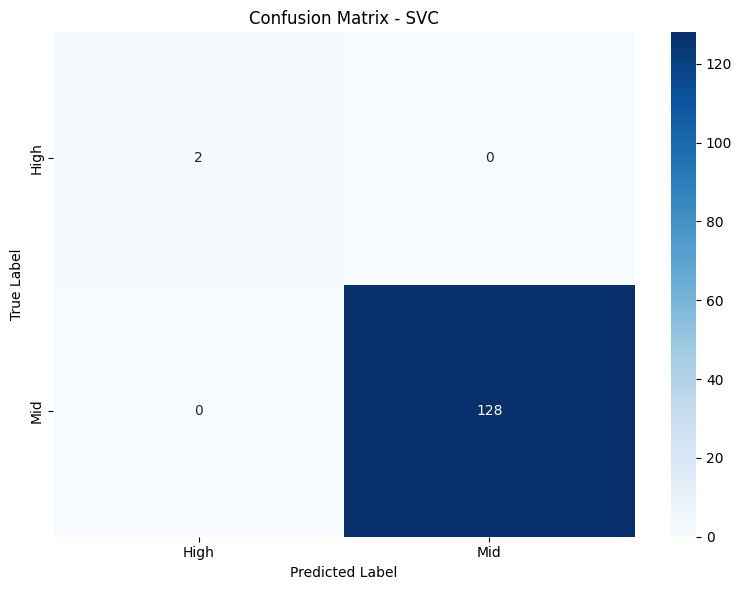

In [12]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_class, y_train_class)
y_pred_svc = svc.predict(X_test_class)

print("Support Vector Classifier Evaluation:")
print(classification_report(y_test_class, y_pred_svc))

cm = confusion_matrix(y_test_class, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)
y_pred_rf = rf_classifier.predict(X_test_class)

print("\nRandom Forest Classifier Evaluation:")
print(classification_report(y_test_class, y_pred_rf))



Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.98      0.99       128

    accuracy                           0.98       130
   macro avg       0.75      0.99      0.83       130
weighted avg       0.99      0.98      0.99       130



In [14]:
lr = LinearRegression()
lr.fit(X_train_score, y_train_score)
y_pred_lr = lr.predict(X_test_score)

mae = mean_absolute_error(y_test_score, y_pred_lr)
mse = mean_squared_error(y_test_score, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_score, y_pred_lr)

print("\nLinear Regression Evaluation:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


Linear Regression Evaluation:
MAE: 0.7083963659097099
MSE: 0.9589456991129096
RMSE: 0.9792577286459931
R2 Score: 0.9544564239420992


In [15]:
svr = SVR(kernel='rbf')
svr.fit(X_train_score, y_train_score)
y_pred_svr = svr.predict(X_test_score)

mae_svr = mean_absolute_error(y_test_score, y_pred_svr)
mse_svr = mean_squared_error(y_test_score, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test_score, y_pred_svr)

print("\nSupport Vector Regression Evaluation:")
print(f"MAE: {mae_svr}")
print(f"MSE: {mse_svr}")
print(f"RMSE: {rmse_svr}")
print(f"R2 Score: {r2_svr}")


Support Vector Regression Evaluation:
MAE: 0.14544853801556992
MSE: 0.11891322430095498
RMSE: 0.3448379681835441
R2 Score: 0.9943524086084846


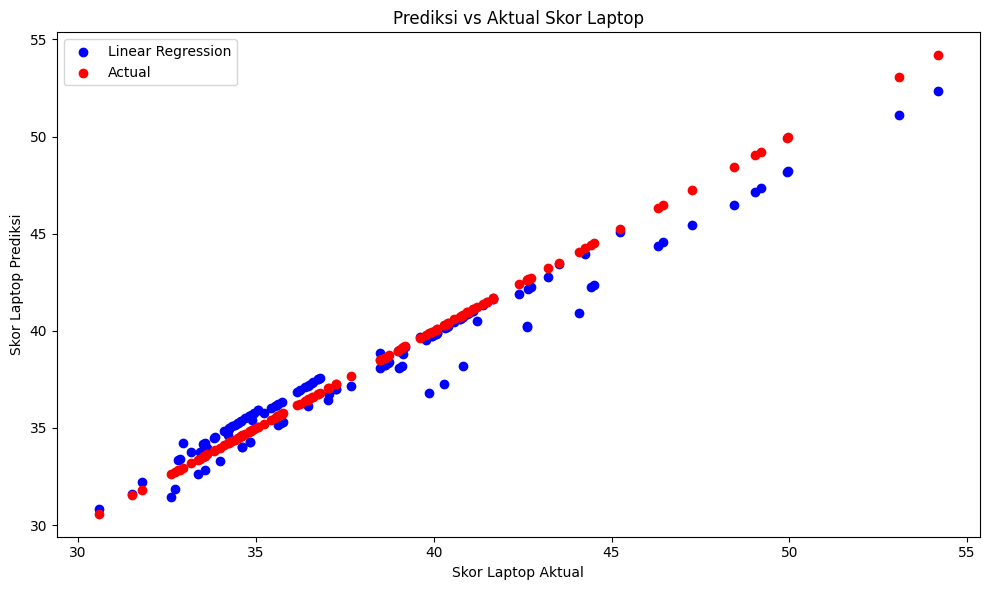

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_score, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test_score, y_test_score, color='red', label='Actual')
plt.title('Prediksi vs Aktual Skor Laptop')
plt.xlabel('Skor Laptop Aktual')
plt.ylabel('Skor Laptop Prediksi')
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
print("\nDistribusi Kelas Laptop:")
print(df['Kelas Laptop'].value_counts(normalize=True) * 100)

df.to_csv('laptop_final_with_scoring.csv', index=False)
print("\nDataset final disimpan di: laptop_final_with_scoring.csv")


Distribusi Kelas Laptop:
Kelas Laptop
Mid     95.510836
High     4.489164
Low      0.000000
Name: proportion, dtype: float64

Dataset final disimpan di: laptop_final_with_scoring.csv


In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [30]:
df = pd.read_csv('laptop_final_with_scoring.csv')
X = df[['Penyimpanan', 'RAM_Numeric', 'Harga', 'Tier VGA', 'Tier Processor']]
y = df['Kelas Laptop']

In [31]:
y_encoded = pd.get_dummies(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [33]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_val_one_hot = to_categorical(y_val, num_classes=3)
print(f"Shape of y_train_one_hot: {y_train_one_hot.shape}")
print(f"Shape of y_val_one_hot: {y_val_one_hot.shape}")

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_val, y_val_one_hot),
    epochs=50,
    batch_size=32,
    verbose=1
)
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


In [36]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

NameError: name 'history' is not defined

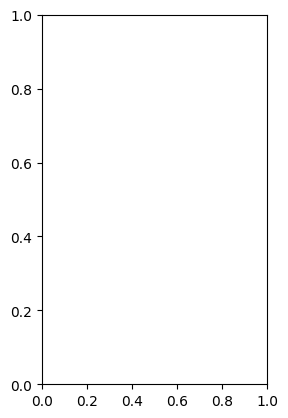

In [37]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

NameError: name 'history' is not defined

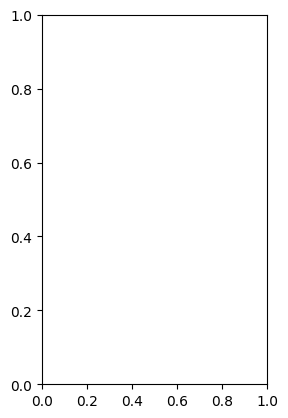

In [38]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()